In [5]:
import pandas as pd
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

# Misc
import warnings
warnings.filterwarnings("ignore")

In [3]:
video = pd.read_csv('video.csv')

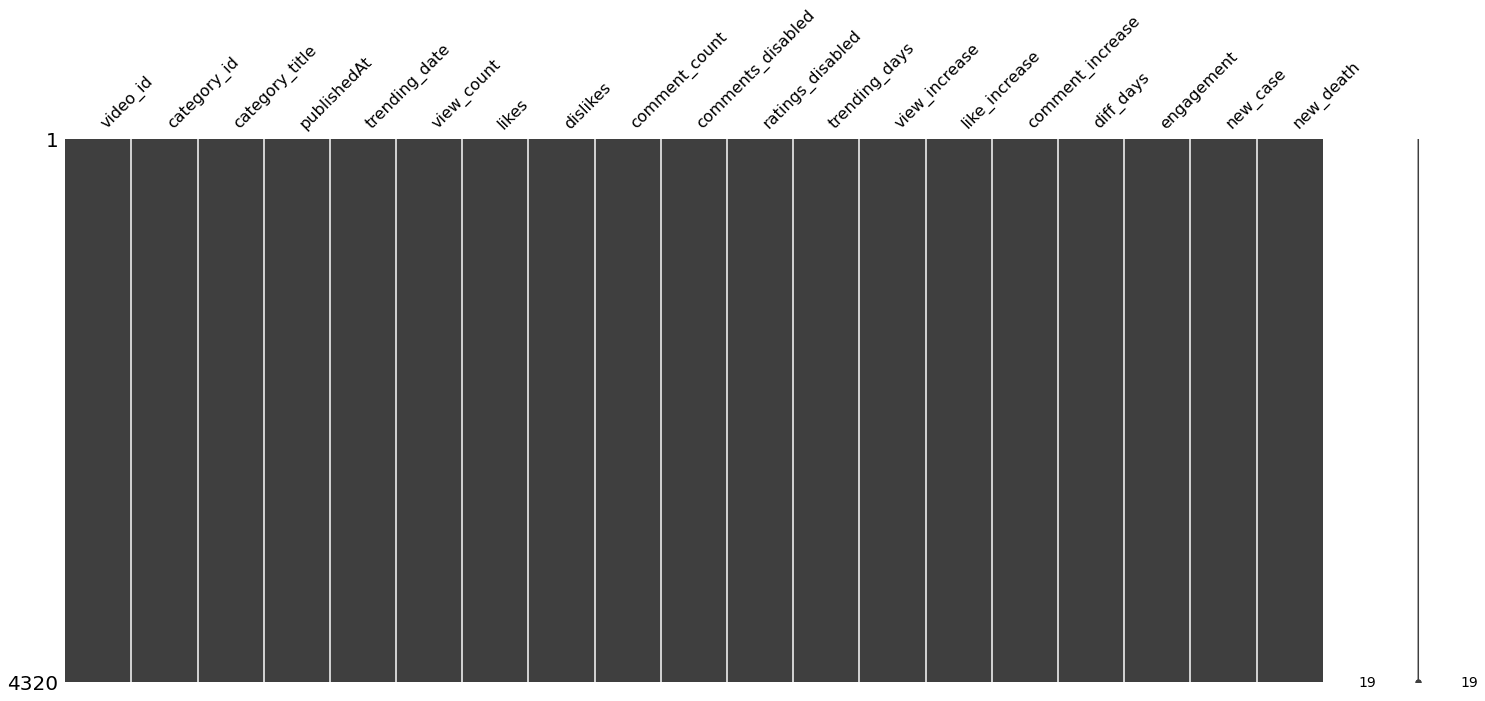

In [4]:
# check missing values 
miss.matrix(video)
    # no missing value 

In [8]:
video

,video_id,category_id,category_title,publishedAt,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,trending_days,view_increase,like_increase,comment_increase,diff_days,engagement,new_case,new_death
0,3C66w5Z0ixs,22,People & Blogs,2020-08-11,2020-08-12,1514614,156908,5855,35313,False,False,6 days,2443612,47352,10261,1 days,4208060,55894,1513
1,49Z6Mv4_WCA,22,People & Blogs,2020-08-11,2020-08-12,940036,87111,1860,7052,False,False,5 days,1049619,47984,2933,1 days,2134735,55894,1513
2,nt3VVyv5pxQ,22,People & Blogs,2020-08-11,2020-08-12,591837,44168,409,2652,False,False,5 days,358083,12707,635,1 days,1010082,55894,1513
3,BNeDH6UTmXw,22,People & Blogs,2020-08-11,2020-08-12,105955,4511,69,673,False,False,4 days,78556,1628,178,1 days,191501,55894,1513
4,gPdUslndvVI,22,People & Blogs,2020-08-11,2020-08-12,277338,37533,197,3666,False,False,5 days,520534,16056,1091,1 days,856218,55894,1513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,zvxrdwbmnHU,29,Nonprofits & Activism,2020-09-01,2020-09-03,345993,5829,172,3209,False,False,4 days,138436,2076,913,2 days,496456,44621,1071
4316,MaZsPh6uyWg,29,Nonprofits & Activism,2020-09-18,2020-09-21,2139440,26578,473,2736,False,False,3 days,751723,9639,1558,3 days,2931674,39137,283
4317,nLW1Acynvb4,29,Nonprofits & Activism,2020-10-20,2020-10-21,171898,39510,442,7770,False,False,5 days,205375,30536,3062,1 days,458151,60980,1025
4318,nGJGnXkWJ20,29,Nonprofits & Activism,2020-10-21,2020-10-23,230407,25549,410,2188,False,False,4 days,212499,14913,585,2 days,486141,82342,941


## Basic Visualizations 

### Bar chart for the distribution of categories

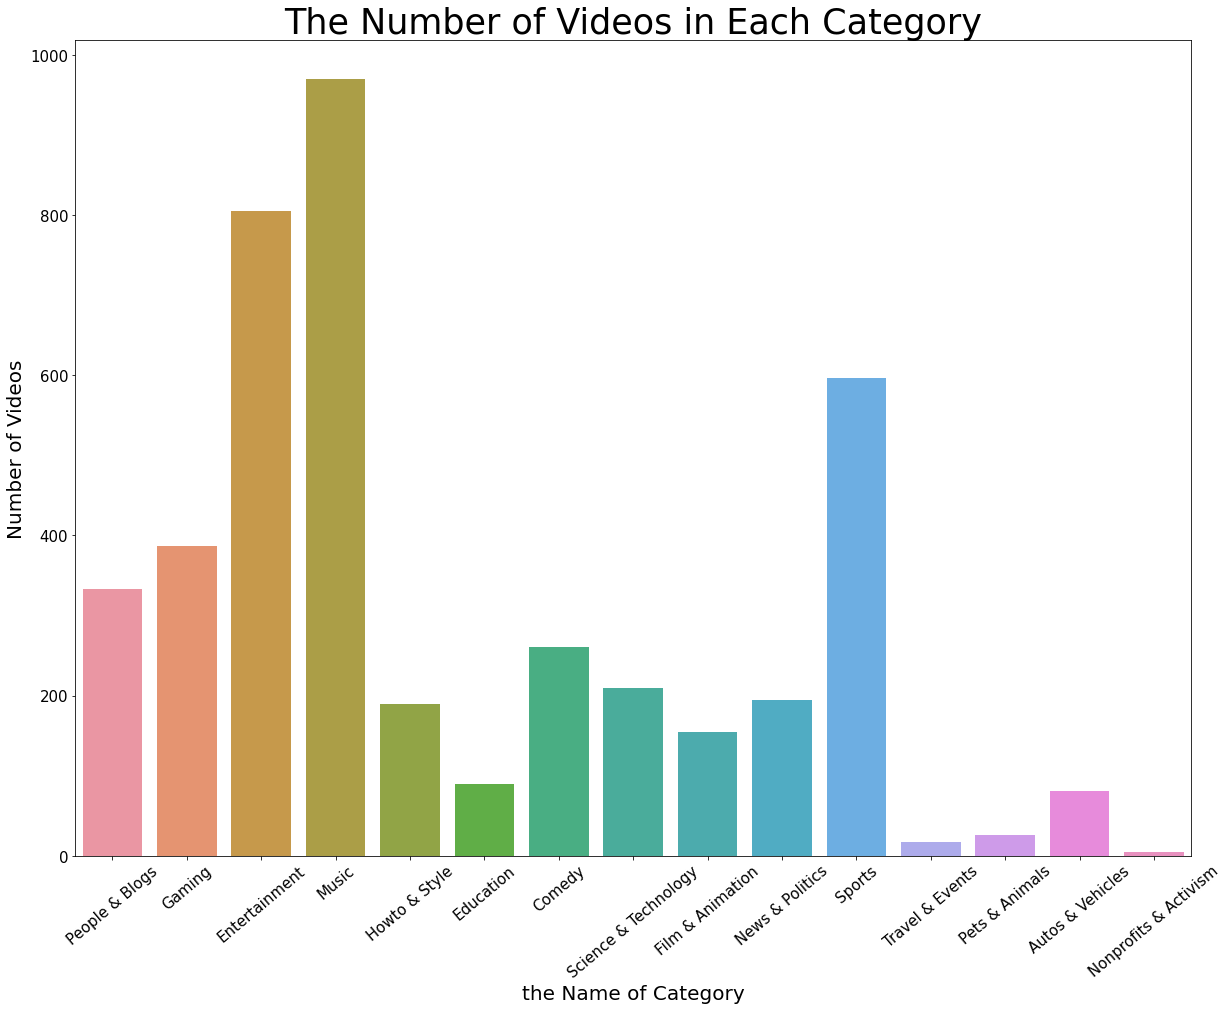

In [7]:
# set the figure size 
plt.figure(figsize = (20,15))

# creat a bar chart 
fig = sns.countplot('category_title',
                    data = video)
# set the tile and labels 
fig.set_title('The Number of Videos in Each Category', fontsize = 35)
fig.set_xlabel('the Name of Category', fontsize = 20)
fig.set_ylabel('Number of Videos', fontsize = 20)

# customize the tickers 
fig.set_xticklabels(fig.get_xticklabels(), rotation = 40)
fig.tick_params(labelsize = 15)

# save figure 
plt.savefig('The Number of Videos in Each Category.png',dpi = 300)

- The Music category has the highest frequency. Because the data set contains only videos that are already trendy, from the graph, we can tell which category appears the most in these trendy videos. Roughly speaking, a video related to music is more likely to be popular

### Scatter plot of trending dates and the number of videos on that trending date

In [11]:
# assign the number of 1 to each video 
video['number'] = 1

In [27]:
# summarize the data set grouped by trending_date
# the number column is the number of all videos that became trendy in that date
number_video_trend_date = video.groupby('trending_date').sum('number').reset_index()

In [28]:
number_video_trend_date

,trending_date,category_id,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,view_increase,like_increase,comment_increase,engagement,new_case,new_death,number
0,2020-08-12,3853,418424556,24127138,897529,2389824,3,0,127670710,3505814,244067,576362109,11178800,302600,200
1,2020-08-13,473,17696122,1095561,32883,159119,1,0,15742557,473888,56677,35223924,1445388,32592,28
2,2020-08-14,608,61004852,6360957,89319,490245,0,0,150629874,4369684,281715,223137327,2169534,46360,38
3,2020-08-15,476,26762876,2001304,55659,192849,0,0,30188095,1122671,64301,60332096,1562680,34328,28
4,2020-08-16,747,51555106,4037595,97714,393176,1,0,40685927,1395113,95397,98162314,1796626,26574,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2020-11-27,251,30678258,3616656,37404,270741,1,0,53432752,1563834,91943,89654184,3302148,23664,17
106,2020-11-28,477,30256640,2318941,51174,227203,0,0,24073643,712131,68900,57657458,4337620,35028,28
107,2020-11-29,599,65703443,4068461,68886,271939,1,1,27726591,802463,41845,98614742,4082700,24690,30
108,2020-11-30,904,59894858,3838209,57308,596048,1,0,27547207,901060,232762,93010144,7126800,49680,48


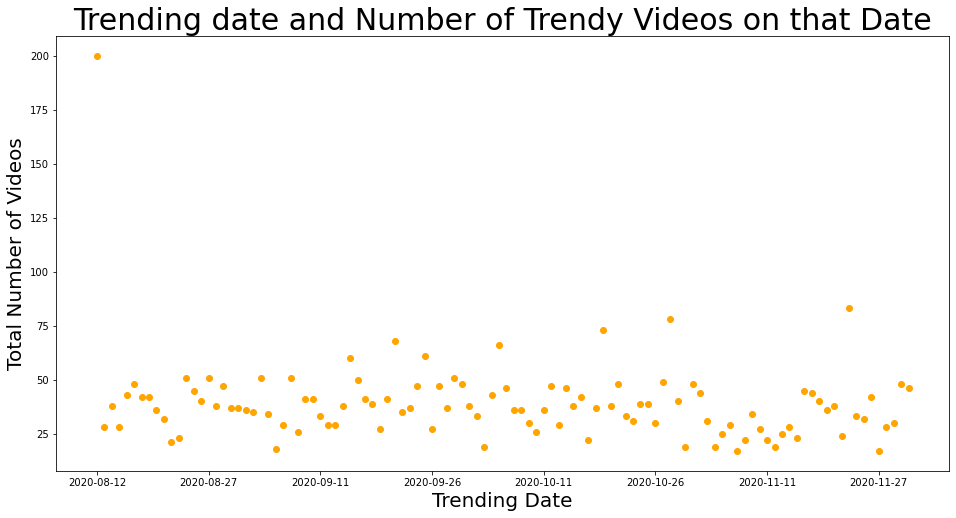

In [34]:
# set the figure size 
plt.figure(figsize = (16,8))
# create the plot 
plt.scatter(x = number_video_trend_date['trending_date'],
            y = number_video_trend_date['number'],
            color = 'orange')
# customize the title and labels 
plt.title('Trending date and Number of Trendy Videos on that Date', fontsize = 30)
plt.xlabel("Trending Date", fontsize = 20)
plt.ylabel("Total Number of Videos", fontsize = 20)
# customize the tickers 
fig2 = plt.gca()
fig2.set_xticks(fig2.get_xticks()[::15])

# save image
plt.savefig('trending_videos.png', dpi = 300)

- By creating this scatterplot, I would like to visualize whether there is a correlation between trending date and the number of videos. If I had observed any trend from this graph, it would mean that there is a specific date/period that can make the video trendy with higher probability. But there is no trend, meaning there is barely a correlation between Date and popularity. 
- Again, because all the videos in this dataset are already trending, so it makes sense to look at the relation between date and the number of trendy videos on that date. 

### Create a correlation table and heatmap for correlations 

In [37]:
# drop the number column 
video.drop('number', axis = 1, inplace = True)

In [38]:
# create a heatmap for the correlation among the variables 
corr = video.corr()

In [39]:
corr

,category_id,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,view_increase,like_increase,comment_increase,engagement,new_case,new_death
category_id,1.000000,-0.036509,-0.106711,-0.036799,-0.069817,0.083577,0.002461,-0.120267,-0.099975,-0.052837,-0.101416,-0.012835,-0.006020
view_count,-0.036509,1.000000,0.794988,0.695430,0.594675,0.021309,0.025570,0.651282,0.627820,0.454780,0.833824,0.011645,0.003768
likes,-0.106711,0.794988,1.000000,0.573483,0.725991,-0.019583,-0.034365,0.730429,0.804188,0.568008,0.832380,0.022295,0.023657
dislikes,-0.036799,0.695430,0.573483,1.000000,0.509335,0.016354,-0.018762,0.504946,0.510407,0.367874,0.619167,-0.014921,0.015981
comment_count,-0.069817,0.594675,0.725991,0.509335,1.000000,-0.021126,-0.009461,0.717200,0.817743,0.860416,0.751337,0.012184,0.022216
comments_disabled,0.083577,0.021309,-0.019583,0.016354,-0.021126,1.000000,0.215341,0.007188,-0.015517,-0.010409,0.010678,-0.008369,-0.007889
ratings_disabled,0.002461,0.025570,-0.034365,-0.018762,-0.009461,0.215341,1.000000,0.001965,-0.020427,-0.004774,0.008073,0.021416,0.023424
view_increase,-0.120267,0.651282,0.730429,0.504946,0.717200,0.007188,0.001965,1.000000,0.917033,0.710763,0.961201,0.017198,0.004908
like_increase,-0.099975,0.627820,0.804188,0.510407,0.817743,-0.015517,-0.020427,0.917033,1.000000,0.803495,0.903649,0.017238,0.019771
comment_increase,-0.052837,0.454780,0.568008,0.367874,0.860416,-0.010409,-0.004774,0.710763,0.803495,1.000000,0.693711,0.008716,0.013221


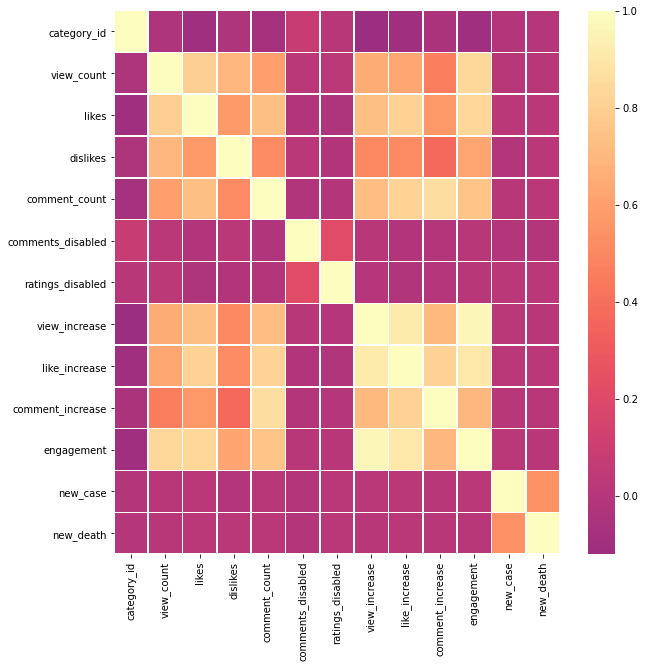

<Figure size 432x288 with 0 Axes>

In [40]:
# set the figure size
plt.figure(figsize = (10,10))  
# generate the heatmap
sns.heatmap(corr,center=0,linewidths=.5,cmap="magma") 
# show the graph 
plt.show() 
# save the plot 
plt.savefig('heatmap.png', dpi = 300)